In [3]:
import keras
from keras.layers import *
import numpy as np
import  pandas as  pd
df= pd.read_csv("./20210331_train.data",names=[i for i in range(106)])
df=df.drop([0],axis=1)

In [4]:
#随机打乱数据
from sklearn.utils import shuffle
df = shuffle(df)
data = df.values
data

array([[ 4.488, 20.549, 44.736, ...,  0.   ,  0.   ,  1.   ],
       [ 4.246, 16.933, 35.2  , ...,  0.   ,  0.   ,  1.   ],
       [11.374, 34.536, 66.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 5.048, 19.229, 35.345, ...,  0.   ,  1.   ,  0.   ],
       [ 5.238, 22.938, 54.194, ...,  0.   ,  0.   ,  1.   ],
       [ 6.453, 30.073, 79.385, ...,  1.   ,  0.   ,  0.   ]])

In [25]:
#1维CNN多频道数据处理
# result=[]
# time_steps = 4 
# for i in range(len(data)-time_steps):
#     result.append(data[i:i+time_steps].T)
# result=np.array(result)
#训练集和测试集的数据量划分
# train_size = int(0.8*len(result))
# print(train_size)
# #训练集切分
# train = result[:train_size,:]
# x_train = train[:,:-1]
# y_train = train[:,-1][:,-1]
# x_test = result[train_size:,:-1]
# y_test = result[train_size:,-1][:,-1]
# print("X_train", x_train.shape)
# print("y_train", y_train.shape)
# print("X_test", x_test.shape)
# print("y_test", y_test.shape)

(56725, 106)

In [6]:
# 这里是一个频道
result=data
data.shape
train_size = int(0.8*len(result))
print(train_size)
#训练集切分
train = result[:train_size]
x_train = train[:,:-1]
y_train = train[:,-1]
x_test = result[train_size:,:-1]
y_test = result[train_size:,-1]
print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

45380
X_train (45380, 104)
y_train (45380,)
X_test (11345, 104)
y_test (11345,)


In [7]:
#查看正负数据比例
list(y_train).count(1.0)

21348

In [8]:
#数据重塑
# cnn1D接收的数据
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_test

array([[[ 3.588],
        [14.939],
        [32.276],
        ...,
        [ 0.   ],
        [ 1.   ],
        [ 0.   ]],

       [[ 3.64 ],
        [13.868],
        [35.114],
        ...,
        [ 1.   ],
        [ 1.   ],
        [ 1.   ]],

       [[ 4.071],
        [14.627],
        [28.369],
        ...,
        [ 0.   ],
        [ 1.   ],
        [ 1.   ]],

       ...,

       [[ 5.048],
        [19.229],
        [35.345],
        ...,
        [ 0.   ],
        [ 0.   ],
        [ 1.   ]],

       [[ 5.238],
        [22.938],
        [54.194],
        ...,
        [ 1.   ],
        [ 0.   ],
        [ 0.   ]],

       [[ 6.453],
        [30.073],
        [79.385],
        ...,
        [ 0.   ],
        [ 1.   ],
        [ 0.   ]]])

In [9]:
#模型构建
model = keras.models.Sequential()
model.add(Conv1D(80, kernel_size=4, activation='relu',input_shape = (104, 1)))
model.add(Conv1D(80, kernel_size=4, activation='relu',input_shape = (104, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))#dropoutlayer with a dropout rate of 0.5
model.add(MaxPooling1D(pool_size=2, strides=None, padding='valid'))#A maximum pooling layer with a pool size of 2 was used
model.add(Flatten())
model.add(Dense(10, activation='relu', use_bias=True))#followed by a fully connected layer comprising 10 neurons with the use of the ReLU activation
model.add(Dense(1, activation='sigmoid', use_bias=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 101, 80)           400       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 98, 80)            25680     
_________________________________________________________________
batch_normalization_1 (Batch (None, 98, 80)            320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 80)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 80)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [10]:
#模型编译
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [12]:
#模型训练
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train,y_train,batch_size=128,epochs=50,validation_split=0.2,verbose=2)
end = timer()
print(end - start)

Train on 36304 samples, validate on 9076 samples
Epoch 1/50
 - 8s - loss: 0.1381 - accuracy: 0.9488 - val_loss: 0.6369 - val_accuracy: 0.8299
Epoch 2/50
 - 8s - loss: 0.1372 - accuracy: 0.9493 - val_loss: 0.5332 - val_accuracy: 0.8180
Epoch 3/50
 - 8s - loss: 0.1368 - accuracy: 0.9492 - val_loss: 0.5073 - val_accuracy: 0.8135
Epoch 4/50
 - 8s - loss: 0.1357 - accuracy: 0.9499 - val_loss: 0.5298 - val_accuracy: 0.8373
Epoch 5/50
 - 8s - loss: 0.1349 - accuracy: 0.9499 - val_loss: 0.4869 - val_accuracy: 0.8208
Epoch 6/50
 - 7s - loss: 0.1366 - accuracy: 0.9495 - val_loss: 0.5387 - val_accuracy: 0.7771
Epoch 7/50
 - 7s - loss: 0.1355 - accuracy: 0.9504 - val_loss: 0.6765 - val_accuracy: 0.8389
Epoch 8/50
 - 8s - loss: 0.1349 - accuracy: 0.9502 - val_loss: 0.6223 - val_accuracy: 0.7989
Epoch 9/50
 - 8s - loss: 0.1353 - accuracy: 0.9506 - val_loss: 0.6120 - val_accuracy: 0.8500
Epoch 10/50
 - 8s - loss: 0.1357 - accuracy: 0.9493 - val_loss: 0.5155 - val_accuracy: 0.7977
Epoch 11/50
 - 8s - 

In [14]:
#模型评估
score = model.evaluate(x_test, y_test, batch_size=20)
score


11345/11345 [==============================] - 1s 51us/step


[0.8585607549885708, 0.75337153673172]

In [15]:
import h5py
from keras.models import load_model
model.save("no_iparatio.h5")

In [16]:
help(model.evaluate)

Help on method evaluate in module keras.engine.training:

evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False) method of keras.engine.sequential.Sequential instance
    Returns the loss value & metrics values for the model in test mode.
    
    Computation is done in batches.
    
    # Arguments
        x: Input data. It could be:
            - A Numpy array (or array-like), or a list of arrays
              (in case the model has multiple inputs).
            - A dict mapping input names to the corresponding
              array/tensors, if the model has named inputs.
            - A generator or `keras.utils.Sequence` returning
              `(inputs, targets)` or `(inputs, targets, sample weights)`.
            - None (default) if feeding from framework-native
              tensors (e.g. TensorFlow data tensors).
        y: Target data. Like the input data `x`,
            it co

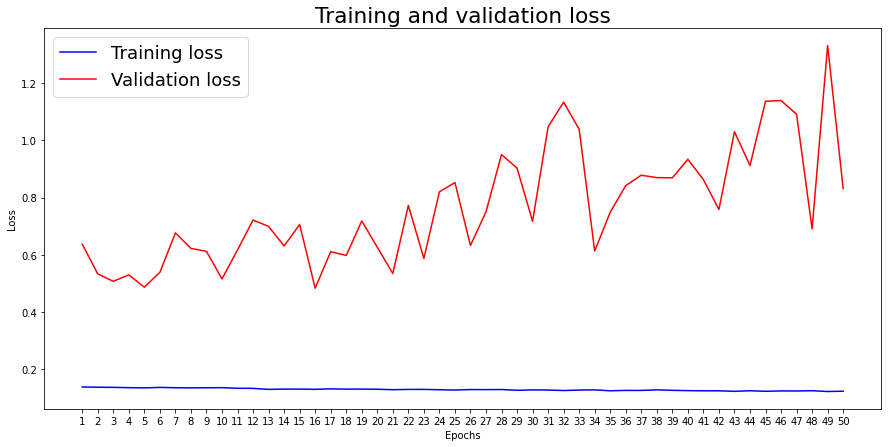

In [19]:
# 画出训练集和验证集的损失曲线

history_dict = history.history
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b', color='blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b', color='red', label='Validation loss')
plt.rc('font', size=18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15, 7)
# fig.savefig('img/tcstest&validationlosscnn.png', dpi=300)
plt.show()


In [22]:
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

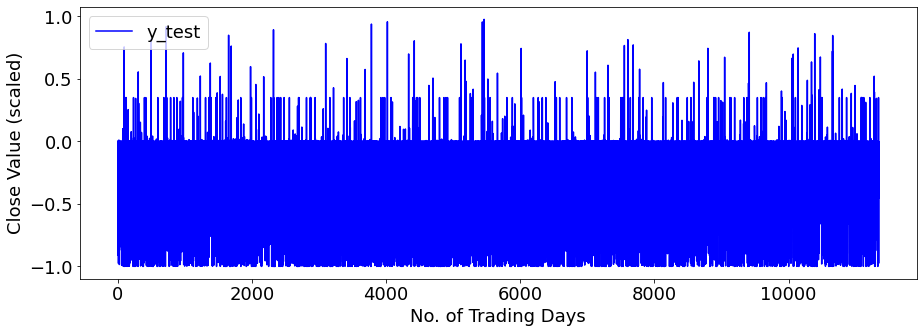

In [35]:
p = model.predict(x_test)
# plt.plot(p,color='red', label='prediction')
plt.plot(y_test-p.reshape(1,-1)[0],color='blue', label='y_test')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
#fig.savefig('img/tcstestcnn.png', dpi=300)
plt.show()


In [34]:
p.reshape(1,-1)[0]-y_test

array([-0.00216901,  0.90956473,  0.3534227 , ...,  0.97450805,
        0.        ,  0.45431024])

KeyError: 'mean_absolute_error'